In [41]:
#install required packages
!pip install imblearn
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
jobPostings_raw_df = pd.read_csv("fake_job_postings.csv")

In [3]:
jobPostings_raw_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
jobPostings_raw_df.shape

(17880, 18)

In [5]:
jobPostings_raw_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
#Examining Null values in each feature

jobPostings_raw_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

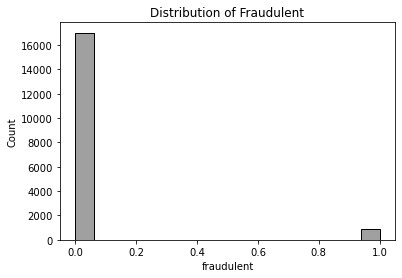

In [7]:
#checking distribution of dependent variable

sns.histplot(jobPostings_raw_df['fraudulent'], color='grey')
plt.title('Distribution of Fraudulent')
plt.show()

In [8]:
#check data columns
jobPostings_raw_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
# let us check the missing values in our dataset

jobPostings_raw_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
jobPostings_raw_df.shape

(17880, 18)

In [11]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
jobPostings_raw_df.fillna(' ', inplace=True)

In [12]:
# #Create independent and Dependent Features
# columns = jobPostings_raw_df.columns.tolist()
# # Filter the columns to remove data we do not want 
# columns = [c for c in columns if c not in ["fraudulent"]]
# # Store the variable we are predicting 
# target = "fraudulent"
# # Define a random state 
# state = np.random.RandomState(42)
# X = data[columns]
# Y = data["fraudulent"]
# X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))


# Define the independent features
features = jobPostings_raw_df.columns.tolist()

# Filter the columns to remove data we do not want 
features = [c for c in features if c not in ["fraudulent"]]

# Define the dependent feature
target = 'fraudulent'

# Split the data into X (independent features) and y (dependent feature)
X_raw = jobPostings_raw_df[features]
y_raw = jobPostings_raw_df[target]

# Create outliers for X
n_samples, n_features = X_raw.shape
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-1, high=1, size=(n_samples, n_features))

# Print the shapes of the data arrays
print(f'X shape: {X_raw.shape}')
print(f'y shape: {y_raw.shape}')
print(f'X_outliers shape: {X_outliers.shape}')

X shape: (17880, 17)
y shape: (17880,)
X_outliers shape: (17880, 17)


In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X_raw, y_raw)

# Print the shapes of the resampled data arrays
print(f'X_resampled shape: {X.shape}')
print(f'y_resampled shape: {y.shape}')

X_resampled shape: (1732, 17)
y_resampled shape: (1732,)


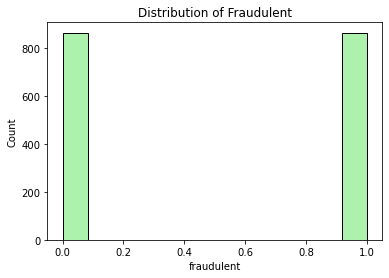

In [16]:
#checking distribution of dependent variable after sampling

sns.histplot(y, color='lightgreen')
plt.title('Distribution of Fraudulent')
plt.show()

In [35]:
#construct the resampled data into our dataframe
jobPostings_df_sampled = pd.concat([X, y], axis=1, join='inner')
display(jobPostings_df_sampled)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,5231,SEM Coordinator,"GR, I, Athens",,,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years...,- Attractive Remuneration Package.- ...,0,1,1,Full-time,,,,,0
1,14113,Senior Data Scientist,"GB, LND, London",Engineering,,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Salary of £40-55k plus stock options£2k annual...,0,1,0,,,,,Engineering,0
2,3169,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα:Hands-on εμπειρία στην δι...,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...,0,1,1,Full-time,Entry level,,Marketing and Advertising,Marketing,0
3,14805,New Product Development Project Leader - Full ...,"US, GA, Atlanta",,,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USAJob Type – Permanen...",,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Management,0
4,5810,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,14000-14000,"We build software for fashion retailers, to he...",About EDITDEDITD’s software is the market lead...,,,0,1,1,Other,Internship,,Apparel & Fashion,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,,Student Positions Part-Time and Full-Time.You ...,,,0,0,0,Part-time,,,,,1
1728,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,,,,,,1
1729,17830,Android Developer,"PL, MZ, Warsaw",,,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,,,,,,1
1730,17831,Payroll Clerk,"US, NY, New York",,,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [36]:
#check if all the missing values are removed
jobPostings_df_sampled.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

Data cleaning is successfully done

# Exploratory Data Analysis

<AxesSubplot:xlabel='fraudulent', ylabel='has_company_logo'>

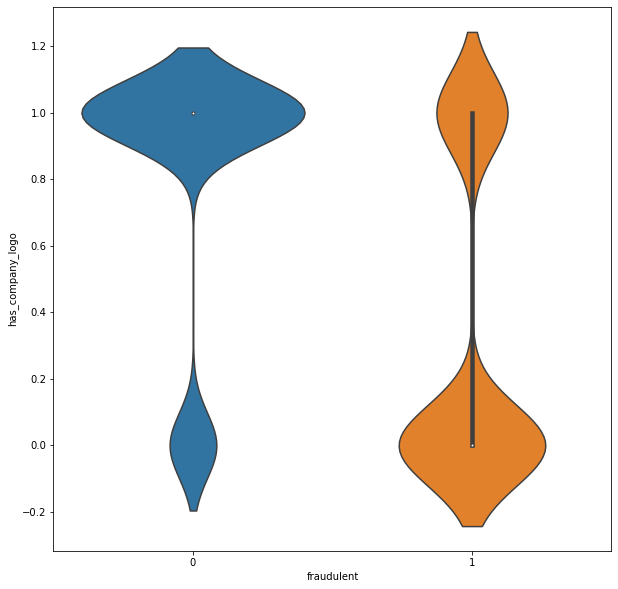

In [37]:
plt.figure(figsize=(10,10))
sns.violinplot(x='fraudulent', y='has_company_logo', data=jobPostings_df_sampled)

In [38]:
#Here we will try to create a word cloud of our textual data
# Define the columns to include in the text
text_columns = ['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'industry']

features = ['job_id', 'salary_range', 'telecommuting', 'has_questions', 'title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'department', 'has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function']

jobPostings_df = jobPostings_df_sampled

# Concatenate the text columns into a new column called 'text'
jobPostings_df['data_in_text_form'] = jobPostings_df_sampled[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

jobPostings_df.head()

# Drop the original text columns
jobPostings_df.drop(columns=features, inplace=True)

# Print the head of the modified dataframe
jobPostings_df.head()


,fraudulent,data_in_text_form
0,0,"SEM Coordinator GR, I, Athens #URL_c379aa63117..."
1,0,"Senior Data Scientist GB, LND, London As a gro..."
2,0,"Junior Web Marketing Specialist GR, I, Ilion Η..."
3,0,New Product Development Project Leader - Full ...
4,0,"Data Intern - Retail & Apparel Analysis GB, LN..."


In [39]:
jobPostings_df.columns

Index(['fraudulent', 'data_in_text_form'], dtype='object')

In [50]:
from wordcloud import WordCloud

words_in_data = ''.join([word for word in jobPostings_df["data_in_text_form"]])

import os

# Define the path to the TrueType font file
font_path = 'C:/Windows/Fonts/arial.ttf'

# Create the WordCloud object with the font_path parameter
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)

# # Generate the word cloud from the text data
# wordcloud.generate(words_in_data)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [53]:
from wordcloud import WordCloud
all_words = ''.join([text for text in jobPostings_df["data_in_text_form"]]) 
     

wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)
     

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

ValueError: Only supported for TrueType fonts